In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [36]:
# Create 40 separable points X with values Y (0 or 1)
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# Add a 41st point to make the points not linearly separable
a = np.array([1,1])
X = np.vstack((X, a))
Y = Y + [0]

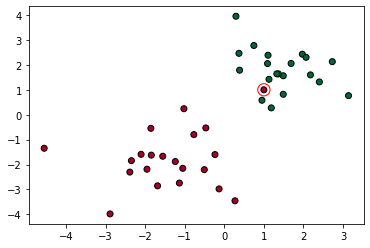

In [37]:
# Plot points
plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn', edgecolors='k')

# Circle outlier
plt.scatter(1, 1, s=150, facecolors='none', zorder=10, edgecolors='r')

Predict for point (-1, 2) using linear kernel: [0]
Predict for point (-1, 2) using poly kernel: [1]
Predict for point (-1, 2) using rbf kernel: [1]


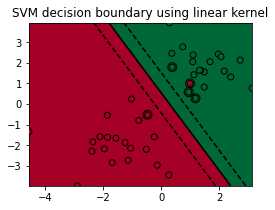

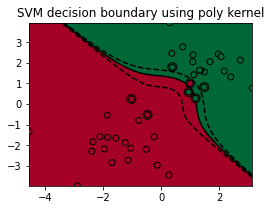

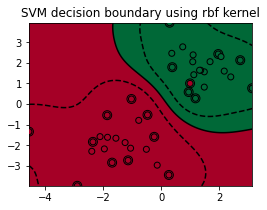

In [39]:
# Demonstrate use of linear, poly and rbf kernels
plot_num = 1

for kernel in ('linear', 'poly', 'rbf'):

    # Prepare the plot number plot_num
    plt.figure(plot_num, figsize=(4, 3))
    plt.clf()
    plt.title(f"SVM decision boundary using {kernel} kernel")

    # Fit the model
    clf = svm.SVC(kernel=kernel, gamma='auto', C=1)
    clf.fit(X, Y)

    # Plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')
    
    # Plot points
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap='RdYlGn', edgecolors='k')
    
    # Create points within a defined range to use for contour plotting; X1 is (200, 200) and X2 is (200, 200)
    x1_min = min(X[:, 0])
    x1_max = max(X[:, 0])
    x2_min = min(X[:, 1])
    x2_max = max(X[:, 1])
    X1, X2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]

    # Unravel points and then classify; Z is (40000, )
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])

    # Put the result into a color plot; Z becomes (200, 200)
    Z = Z.reshape(X1.shape)

    # Use red and green to distinguish the boundary
    plt.pcolormesh(X1, X2, Z > 0, cmap='RdYlGn')

    # Plot the hyperplane
    plt.contour(X1, X2, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
 
    # Predict for a new point 
    print(f"Predict for point (-1, 2) using {kernel} kernel: {clf.predict([[-1., 2.]])}" )
    
    plot_num += 1

plt.show()